# A tutorial on how to access the netCDF file downloaded from NASA
Find and download NASA data from here: https://disc.gsfc.nasa.gov/datasets?keywords=GLDAS

Before running, make sure you have all the packages needed

In [1]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import pandas as pd

Read the netCDF file as a "Dataset"

In [2]:
file = nc.Dataset('./data/demo.nc4', "r")
file

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    CDI: Climate Data Interface version 1.9.7.1 (http://mpimet.mpg.de/cdi)
    Conventions: CF-1.6
    history: created on date: 2019-09-16T12:02:35.573
    source: CLSM_F2.5/CSR_GRACE_GRACE-FO_RL06_Mascons_all-corrections_2002-04_2019-08.nc/ECMWF
    institution: NASA GSFC HSL
    missing_value: -9999.0
    tavg definision:: 24-hour average
    title: GLDAS2.2 LIS land surface model output
    references: Li_etal_WRR_2019, Li_etal_SciRep_2019, Li_etal_GRL_2017, Rodell_etal_BAMS_2004, Kumar_etal_EMS_2006, Peters-Lidard_etal_ISSE_2007
    conventions: CF-1.6
    comment: website: https://ldas.gsfc.nasa.gov/gldas, https://lis.gsfc.nasa.gov/
    MAP_PROJECTION: EQUIDISTANT CYLINDRICAL
    SOUTH_WEST_CORNER_LAT: -59.875
    SOUTH_WEST_CORNER_LON: -179.875
    DX: 0.25
    DY: 0.25
    history_L34RS: 'Created by L34RS v1.3.1 @ NASA GES DISC on April 30 2020 23:52:12. Spatial: -180.0 180.0 -60.0 90.0. Varia

Almost everything you need is in `file.variables` which is a dictionary

In [3]:
file.variables.keys()

dict_keys(['time', 'time_bnds', 'lon', 'lat', 'AvgSurfT_tavg'])

`variables` work like a numpy masked array with added info

In [4]:
lat = file.variables['lat']
print(lat) # print some info

<class 'netCDF4._netCDF4.Variable'>
float32 lat(lat)
    standard_name: latitude
    long_name: latitude
    units: degrees_north
    axis: Y
unlimited dimensions: 
current shape = (600,)
filling off


In [5]:
print(lat[34]) # print the 35th element in the array, -51.375

-51.375


To get the numpy masked array only, we can use slicing

In [6]:
lat = lat[:]
lat

masked_array(data=[-59.875, -59.625, -59.375, -59.125, -58.875, -58.625,
                   -58.375, -58.125, -57.875, -57.625, -57.375, -57.125,
                   -56.875, -56.625, -56.375, -56.125, -55.875, -55.625,
                   -55.375, -55.125, -54.875, -54.625, -54.375, -54.125,
                   -53.875, -53.625, -53.375, -53.125, -52.875, -52.625,
                   -52.375, -52.125, -51.875, -51.625, -51.375, -51.125,
                   -50.875, -50.625, -50.375, -50.125, -49.875, -49.625,
                   -49.375, -49.125, -48.875, -48.625, -48.375, -48.125,
                   -47.875, -47.625, -47.375, -47.125, -46.875, -46.625,
                   -46.375, -46.125, -45.875, -45.625, -45.375, -45.125,
                   -44.875, -44.625, -44.375, -44.125, -43.875, -43.625,
                   -43.375, -43.125, -42.875, -42.625, -42.375, -42.125,
                   -41.875, -41.625, -41.375, -41.125, -40.875, -40.625,
                   -40.375, -40.125, -39.875, -39.6

Note: the temperature array is 3 dimensional (time, lat, lon)

In [7]:
temp = file.variables['AvgSurfT_tavg']
temp # shape = (1, 600, 1440)

<class 'netCDF4._netCDF4.Variable'>
float32 AvgSurfT_tavg(time, lat, lon)
    standard_name: surface_temperature
    long_name: Average Surface Skin temperature
    units: K
    _FillValue: -9999.0
    missing_value: -9999.0
    cell_methods: time: mean
    vmin: 210.53307
    vmax: 318.10614
unlimited dimensions: time
current shape = (1, 600, 1440)
filling off

In [8]:
temp = temp[0]
temp

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=-9999.0,
  dtype=float32)

Right now the fill value is -9999 (a number) for masked values in the masked array  
This will likely mess up on our calculation

In [9]:
temp.filled()

array([[-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       ...,
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.]],
      dtype=float32)

We can set it to `np.nan` to avoid it

In [10]:
temp.set_fill_value(np.nan)

In [11]:
temp.filled()

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

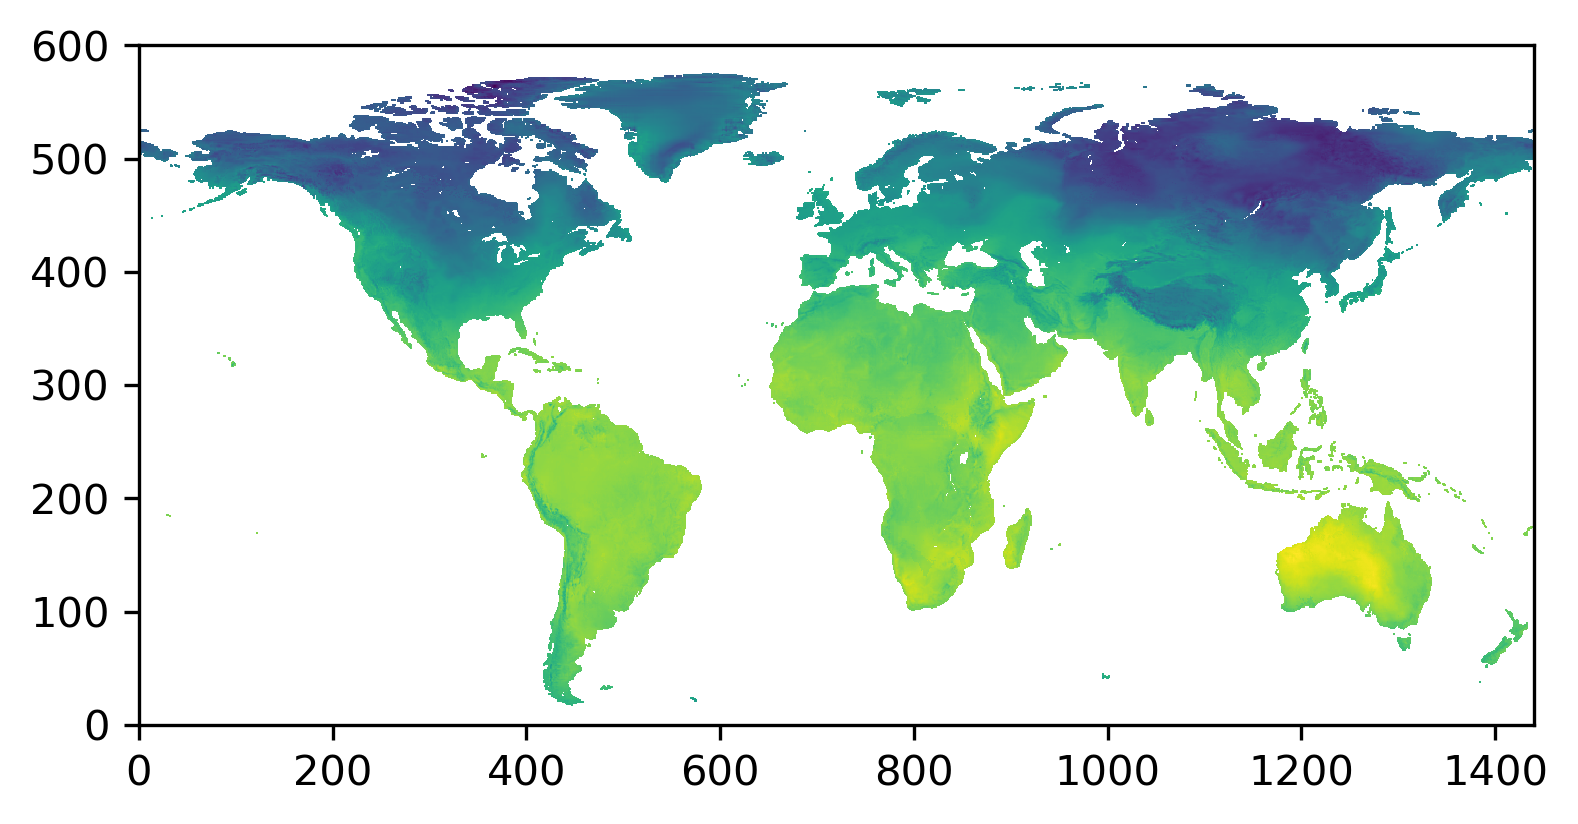

In [12]:
plt.figure(figsize=(6, 3), dpi=300)
plt.pcolormesh(temp)

If somehow you want to use the mask, here it is:

In [13]:
temp.mask

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

To learn more about numpy masked array:  
https://numpy.org/devdocs/reference/maskedarray.generic.html  
More about netCDF4:  
https://unidata.github.io/netcdf4-python/netCDF4/index.html